### Importing the dependencies

In [2]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [3]:
# Load the dataset
df = pd.read_csv("gold_price_data.csv")

In [4]:
# Print first 5 rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Print all columns
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [6]:
# Dataset dimensions
df.shape

(2290, 6)

In [7]:
# Basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Statistical Measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Data Overview : This data file is a Comma separated value file format with 2290 rows and 6 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

Columns names meaning and definitions :
<br>
Date - Date (mm/dd/yyyy format) <br>
SPX - Standard and Poor's 500 index. Used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA <br>
GLD - Gold price <br>
USO - The United States Oil Fund ® LP (USO). It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca <br>
SLV - Silver price <br>
EUR/USD - Euro to US dollar exchange ratio <br>

In [9]:
# Check for missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

0

### Correlation

In [22]:
# Correlation
correlation = df.drop('Date', axis=1).corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

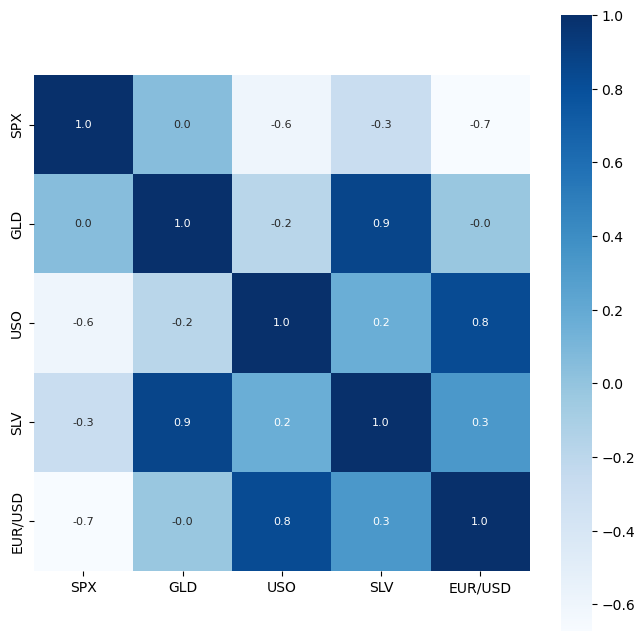

In [ ]:
# Heatmap (to understand correlation)
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [27]:
# Correlation values of GLD
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

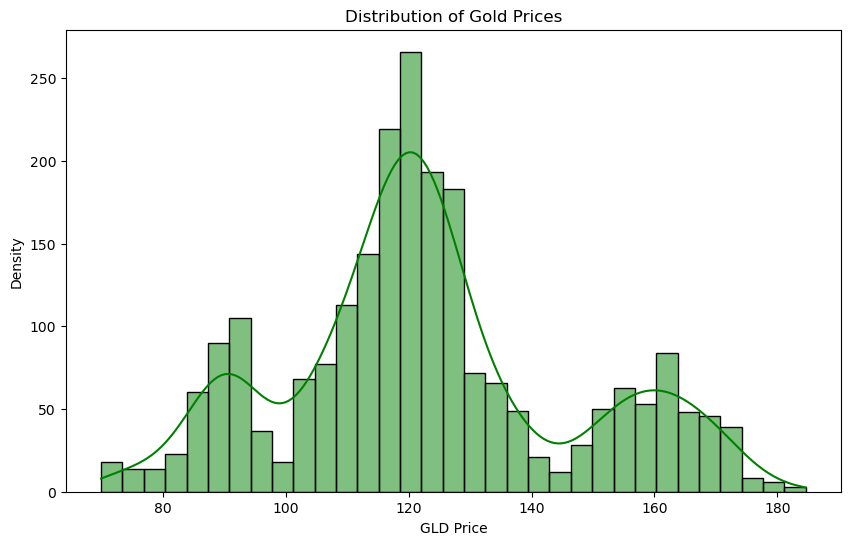

In [ ]:
# Check the distribution of the GLD price
plt.figure(figsize = (10, 6))
sns.histplot(x = df['GLD'], color='green', kde=True)
plt.xlabel('GLD Price')
plt.ylabel('Density')
plt.title('Distribution of Gold Prices')
plt.show()

### Splitting the Features and Target

In [33]:
X = df.drop(["Date","GLD"], axis = 1)
Y = df["GLD"]

In [34]:
# Print X
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [35]:
# Print Y
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Splitting the dataset into training and test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

### Model Training : Random Forest Regressor

In [37]:
regressor = RandomForestRegressor(n_estimators = 100)

In [38]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

In [39]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [40]:
# Print test_data_prediction
test_data_prediction

array([163.14130088, 127.47519886, 124.27959957, 119.57869912,
       125.9890989 ,  86.62409791, 171.77940063, 136.9888997 ,
       106.78270052, 133.18400178, 120.57899942, 124.83150027,
       143.36849807, 104.48909979,  80.86649906, 119.88350024,
       140.70249928,  90.54770006,  91.55309946, 128.32600212,
       126.03429977, 147.99610011, 116.44120135, 153.32529861,
       129.55469882, 129.71190081, 118.32260114, 111.48270044,
       168.03270123, 157.68879835, 126.22020173, 154.00720156,
       127.09189966, 122.84069784, 116.16680143, 154.73239948,
       115.05869987, 120.51070163, 103.64320176, 105.35670017,
       134.71659956,  85.77699936, 156.08810122, 121.58469997,
       122.34490061, 155.3773007 , 120.35990057, 116.40629972,
       168.52030161, 116.5574008 , 138.36640096, 161.83229854,
       158.89220085, 153.34879977, 123.7184001 , 116.97959997,
       167.22840081, 117.13559973, 165.73440015,  84.34370001,
       121.37869905, 122.18520004, 119.99350074, 172.05

In [44]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9856446401340012


### Compare actual values and predicted values

In [45]:
Y_test = list(Y_test)

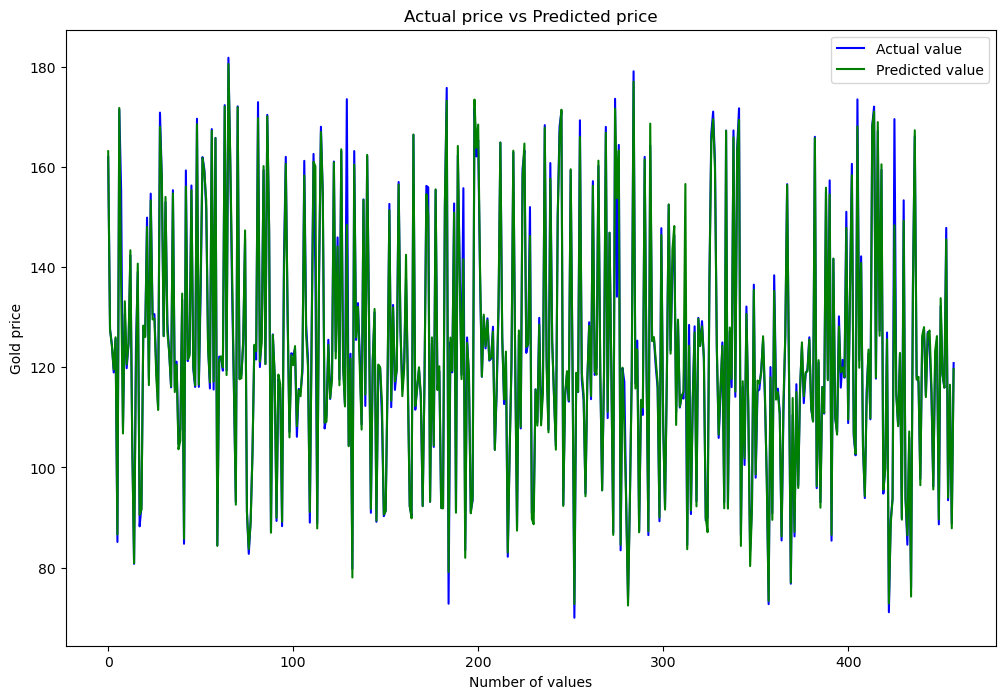

In [54]:
plt.figure(figsize=(12, 8))  # Added this line to make plot bigger
plt.plot(Y_test, color = "blue", label = "Actual value")
plt.plot(test_data_prediction, color = "green", label = "Predicted value")
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of values")
plt.ylabel("Gold price")
plt.legend(loc='upper right')
plt.show()